# 350 book 1

This is a jupyter notebook illustrating the importation and display of an .abf file.

<u>Version 2019-02-17.</u>  Tested to be compatible with:
* python 3.7.2
* conda 4.64
* Jupyter notebook server 5.5.0; IPython 7.2.0
* matplotlib 3.0.2
* neo 0.7.1

It requires installation of neo (**pip install neo** from a terminal window rather than through conda).

To execute each cell and advance to the next, hit shift+enter.

If you are getting migration errors, this relates to having previously installed julia.  Try moving the .jupyter folder to Applications.  See [this](https://stackoverflow.com/questions/52349503/error-when-opening-jupyter-notebook-from-terminal-on-mac) for more discussion.

In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

# this will display plots inline.  You could also use a different argument (e.g. tk) to display in a new window
# the correct "magic command" to get matplotlib working the way you like will depend on your version of jupyter.
# feel free to google for and read about the different back-ends for matplotlip

Neo can load the .abf file into a hierarchical data structure.

You can read more about the data structure here: https://pythonhosted.org/neo/io.html#introduction

In [17]:
import os
folder='lab4'
os.listdir(folder+'/data/')

['19925001.abf', '19923001.abf']

In [22]:
segment.analogsignals[0]

AnalogSignal with 1 channels of length 1547776; units uV; datatype float32 
name: 'IN0'
annotations: {'channel_id': 0, 'nADCNum': 0}
sampling rate: 10000.0
time: 0.0 to 154.7776

lab3/data/19918003.abf
(1496064, 1)
lab3/data/19918002.abf
(1237504, 1)


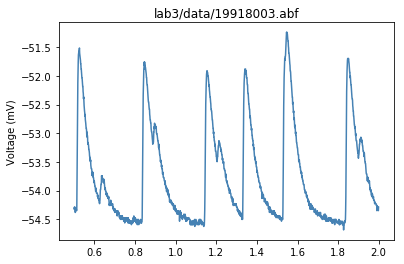

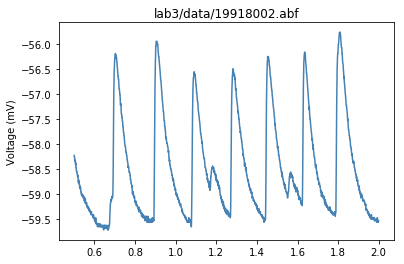

In [41]:
# specify the location and name of the data file
import os
folders=['lab3']

for folder in folders:
    files=[folder+'/data/'+x for x in os.listdir(folder+'/data/')]
    for data_file in files:
        r = neo.AxonIO(filename=data_file)
        print(data_file)
        block = r.read_block()
        segment = block.segments[0]
        nerve = segment.analogsignals[0]
        nerve_unit = nerve.units.dimensionality.string
        sample_period = nerve.sampling_period
        sample_period_unit = sample_period.units.simplified.dimensionality.string
        times = np.asarray(nerve.times)
        nerve = np.asarray(nerve)
        print(nerve.shape)
        plt.figure()
        plt.title(data_file)
        
        # plot nerve
        plt.plot(times[5000:20000:10], nerve[5000:20000:10], color='steelblue')
        plt.ylabel('Voltage ({})'.format(nerve_unit))


In [38]:
1237504/120

10312.533333333333

In [5]:
# read out the 2 signals of interest

nerve,muscle = segment.analogsignals

# if you only have one channel, load it like this instead: nerve = segment.analogsignals[0]
# and then comment out any treatment of `muscle` below

In [6]:
# the neo data structure has lots of useful information, but plotting from it directly can be buggy
# let's extract pertinent information before flattening the data to arrays.

nerve_unit = nerve.units.dimensionality.string
muscle_unit = muscle.units.dimensionality.string
sample_period = nerve.sampling_period
sample_period_unit = sample_period.units.simplified.dimensionality.string


times = np.asarray(nerve.times)
nerve = np.asarray(nerve)
muscle = np.asarray(muscle)

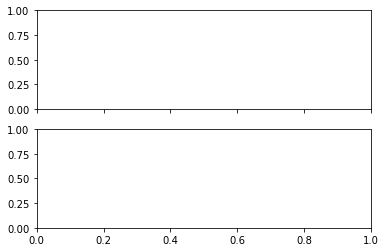

In [8]:
# create a figure with 2 axes, one for nerve and one for muscle
fig,axs = plt.subplots(2, 1, sharex=True)

Now load your data into the plots.  Play with the pan functionality and/or zoom to window button to view a stretch of data that makes sense (maybe a second or two).  The two panes will be locked to the same X range but scale Y independently.

In [9]:
# plot nerve
axs[0].plot(times, nerve, color='steelblue')
axs[0].set_ylabel('Voltage ({})'.format(nerve_unit))
axs[0].set_title('Nerve')

# plot muscle
axs[1].plot(times, muscle, color='orange')
axs[1].set_ylabel('Voltage ({})'.format(muscle_unit))
axs[1].set_xlabel('Time ({})'.format(sample_period_unit))
axs[1].set_title('Muscle')

#pl.show()

Text(0.5, 1.0, 'Muscle')

If you want to load a smaller range of the data to begin with (say, because of those artifacts that you don't want to emphasize, or because you don't want to include the time it takes your high pass filter to bring your signal to zero), you can take a slice of the time and voltage traces.

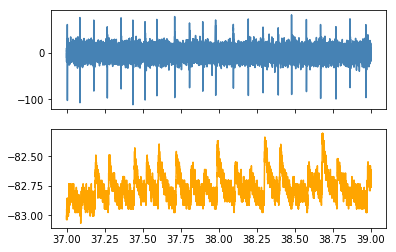

In [11]:
fig,axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(times[370001:390000], nerve[370001:390000], color='steelblue')
axs[1].plot(times[370001:390000], muscle[370001:390000], color='orange')